# (Dataset Exploration Title)
## by Beijia(Frances) Yu

## Preliminary Wrangling

> This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib.colors import ListedColormap

%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)

sns.set(color_codes=True)

In [2]:
data_dir = "./data"

data_filepath = os.path.join(data_dir, 'vgsales_clean.csv')

In [3]:
df_sales = pd.read_csv(data_filepath)

In [4]:
df_sales.head(10)

,rank,name,platform,year,genre,publisher,north_america_sales_in_millions,europe_sales_in_millions,japan_sales_in_millions,other_sales_in_millions,global_sales_in_millions
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   rank                             16290 non-null  int64  
 1   name                             16290 non-null  object 
 2   platform                         16290 non-null  object 
 3   year                             16290 non-null  int64  
 4   genre                            16290 non-null  object 
 5   publisher                        16290 non-null  object 
 6   north_america_sales_in_millions  16290 non-null  float64
 7   europe_sales_in_millions         16290 non-null  float64
 8   japan_sales_in_millions          16290 non-null  float64
 9   other_sales_in_millions          16290 non-null  float64
 10  global_sales_in_millions         16290 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [6]:
df_sales.describe()

,rank,year,north_america_sales_in_millions,europe_sales_in_millions,japan_sales_in_millions,other_sales_in_millions,global_sales_in_millions
count,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000
mean,8145.500000,2006.405218,0.265663,0.147740,0.078838,0.048429,0.540943
std,4702.662278,5.832427,0.822455,0.509317,0.311888,0.190088,1.567387
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4073.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8145.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12217.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16290.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df_sales['platform'].unique().size

31

In [8]:
df_sales['genre'].unique().size

12

In [9]:
df_sales['publisher'].unique().size

576

### What is the structure of your dataset?

> * In total, there are 16290 records. Among 11 columns, 4 of them have string types while others are numeric
> * It contains 576 publishers, 12 genres and 31 platforms

### What is/are the main feature(s) of interest in your dataset?

> * Which factor contributes the most to high sales globally?
> * Do factors have similar impact or different on various parts of the world?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> * Which factor contributes the most to high sales globally?
>  * platform, year, genre, publisher, global_sales
> * Do factors have similar impact or different on various parts of the world?
>  * platform, year, genre, publisher, north_america_sales_in_millions, europe_sales_in_millions,japan_sales_in_millions, other_sales_in_millions

> Create new column for indicating which region won the highest sales for each video games

In [19]:
df_data = df_sales.copy()

In [ ]:
df_data

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

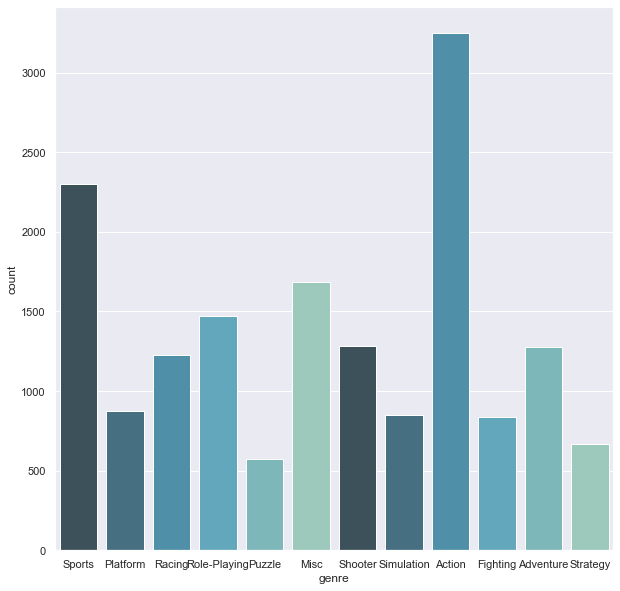

In [10]:
sns.countplot(x='genre', data=df_sales, palette=sns.color_palette("GnBu_d"))

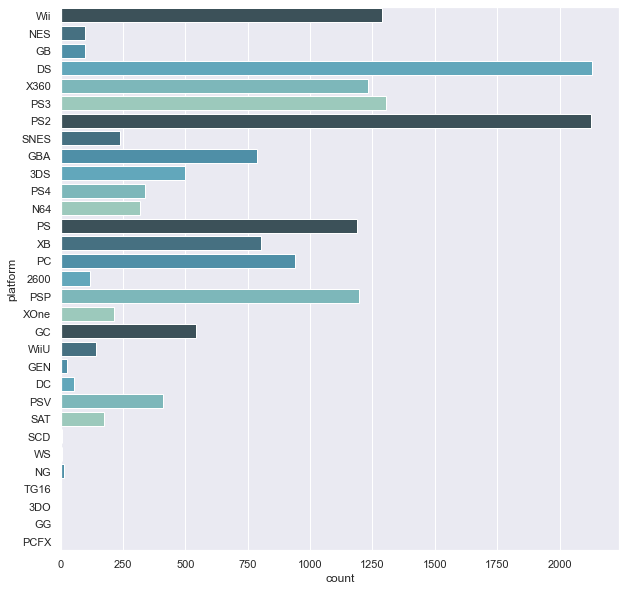

In [11]:
sns.countplot(y='platform', data=df_sales, palette=sns.color_palette("GnBu_d"))

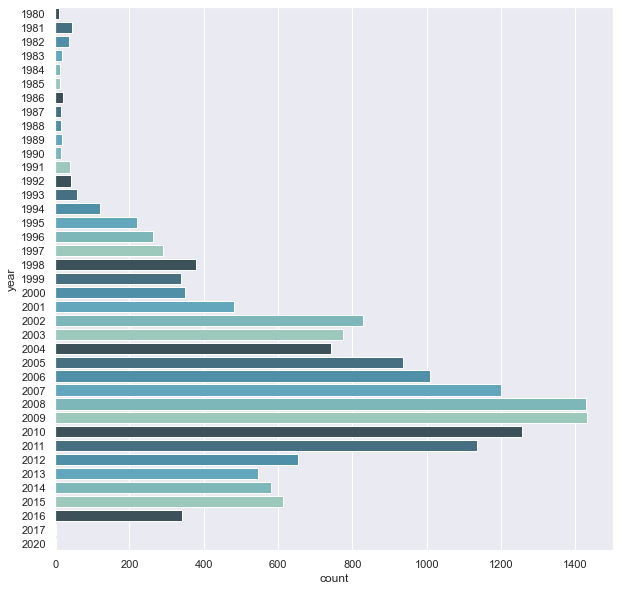

In [12]:
sns.countplot(y='year', data=df_sales, palette=sns.color_palette("GnBu_d"))

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

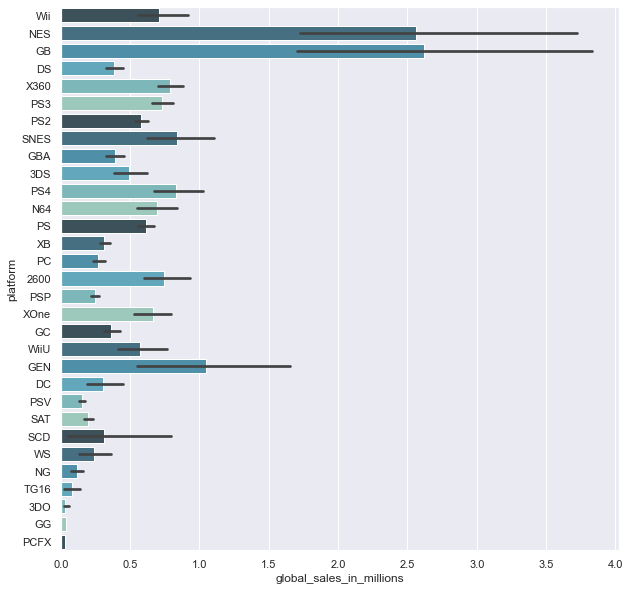

In [18]:
sns.barplot(y="platform", x="global_sales_in_millions", data=df_sales, palette=sns.color_palette("GnBu_d"))

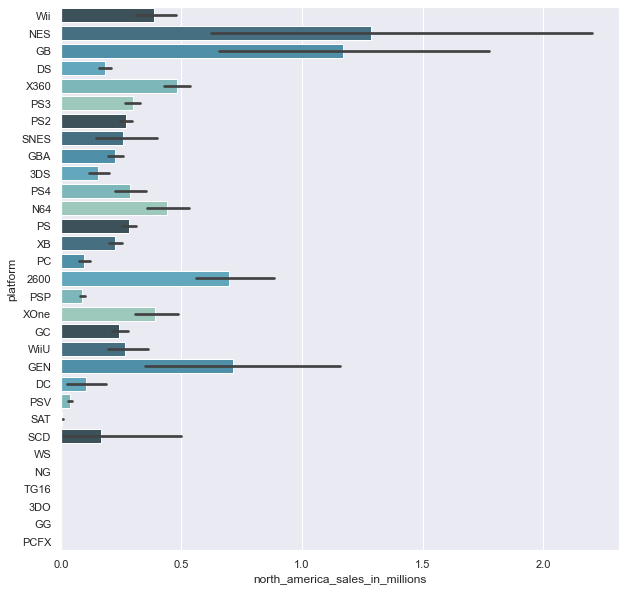

In [15]:
sns.barplot(y="platform", x="north_america_sales_in_millions", data=df_sales, palette=sns.color_palette("GnBu_d"))

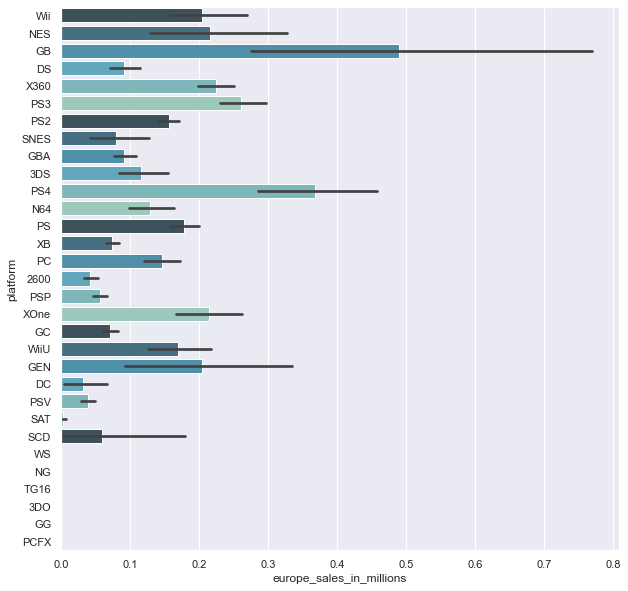

In [16]:
sns.barplot(y="platform", x="europe_sales_in_millions", data=df_sales, palette=sns.color_palette("GnBu_d"))

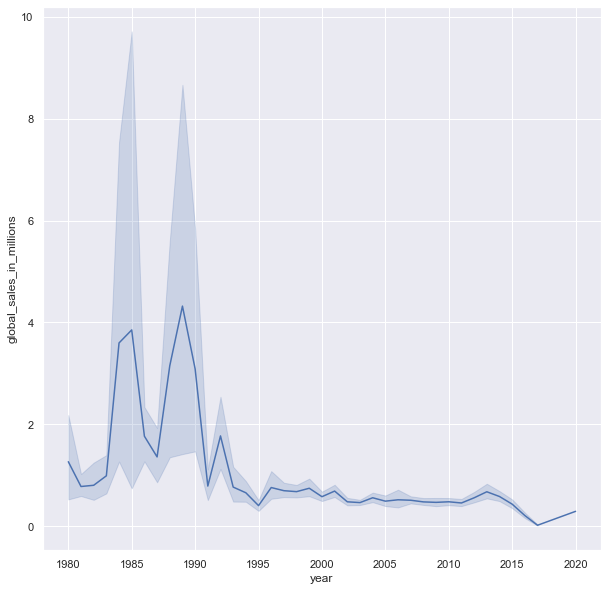

In [14]:
sns.lineplot(x="year", y="global_sales_in_millions", data=df_sales)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!